In [35]:
import pandas as pd
df = pd.read_csv('mcdonalds.csv')
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [36]:
df.shape

(1453, 15)

In [37]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [38]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x]=LabelEncoder().fit_transform(df[x])
    return df
cat=df.columns[0:11]
for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


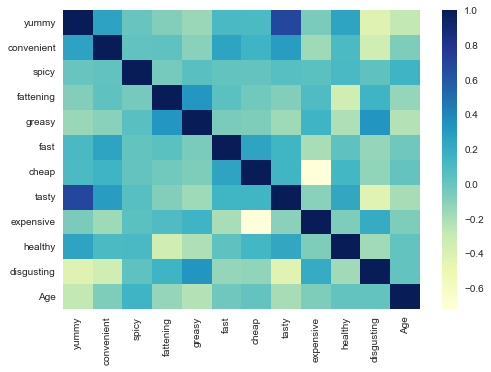

{'yummy': 0.55,
 'convenient': 0.91,
 'spicy': 0.09,
 'fattening': 0.87,
 'greasy': 0.53,
 'fast': 0.9,
 'cheap': 0.6,
 'tasty': 0.64,
 'expensive': 0.36,
 'healthy': 0.2,
 'disgusting': 0.24}

In [39]:
import numpy as np

MD_x = df.iloc[:, 0:11].values
import seaborn as sns
import matplotlib.pyplot as plt
hm = sns.heatmap(df.corr(),cmap="YlGnBu", )
plt.show()
result = np.round(np.mean(MD_x, axis=0), 2) 
dict(zip(df.columns[0:11], result))

In [40]:
from sklearn.decomposition import PCA


MD_pca = PCA()
pf = MD_pca.fit_transform(MD_x)
pca_df = pd.DataFrame(pf, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11'])
# Accessing the summary of the PCA results
summary = {
    'Standard deviation': MD_pca.explained_variance_ ** 0.5,
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
}

pd.DataFrame(summary, index=['PC{}'.format(i+1) for i in range(11)])



,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [41]:
loadings = MD_pca.components_
num_pc = MD_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,np.round( loadings,3))))
loadings_df['variable'] = df.columns[:11].values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490


In [42]:
print('Standard deviations:\n', MD_pca.singular_values_)
print('Rotation matrix:\n', MD_pca.components_)

Standard deviations:
 [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
Rotation matrix:
 [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0

(1453, 11)


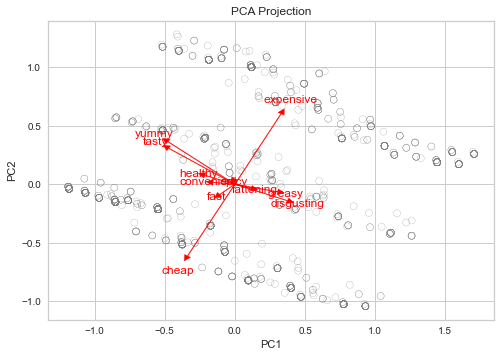

In [43]:
import matplotlib.pyplot as plt

# Predicted values
predicted_values = MD_pca.transform(MD_x)
print(predicted_values.shape)
# Plot predicted values
plt.scatter(predicted_values[:, 0], predicted_values[:, 1],facecolors='none', edgecolors='grey', alpha=0.75)

# Plot projection axes
projection_axes = MD_pca.components_.T
# print(projection_axes)
for i in range(projection_axes.shape[0]):
    # print(i)
    plt.arrow(0, 0, projection_axes[i, 0], projection_axes[i, 1], head_width=0.05, head_length=0.05, fc='red', ec='red', width= 0.005)
    plt.text(projection_axes[i, 0]*1.2, projection_axes[i, 1]*1.2, df.columns[i], color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()


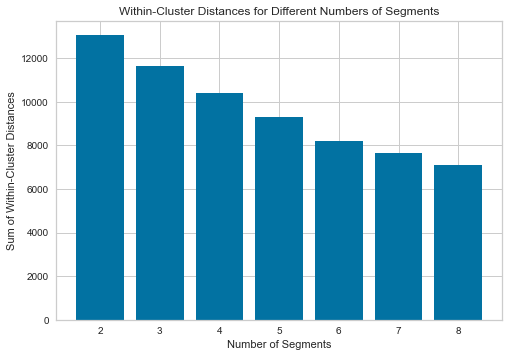

In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
MD_xs = scaler.fit_transform(MD_x)

segment_numbers = range(2, 9)
within_cluster_distances = []

var = []
for n_clusters in segment_numbers:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    var = kmeans.fit(MD_xs)
    within_cluster_distances.append(kmeans.inertia_)
    
plt.bar(segment_numbers, within_cluster_distances)

plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Within-Cluster Distances for Different Numbers of Segments")
plt.show()

In [45]:
kmeans = KMeans(4)
kmeans.fit_predict(MD_xs)
pca_df_km = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

In [46]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

n_boot = 100
k_range = range(2, 9)
n_rep = 10
cluster_results = []

for k in k_range:
    k_results = []
    for i in range(n_rep):
        # Generate a bootstrap sample
        bootstrap_sample = resample(MD_x, n_samples=len(MD_x))

        # Perform clustering on the bootstrap sample
        Kmeans = KMeans(n_clusters=k)
        Kmeans.fit(bootstrap_sample)

        # Store the clustering result
        k_results.append(Kmeans.labels_)

    # Store the clustering results for this k
    cluster_results.append(k_results)


adjusted_rand_index = []

# Loop over each k and calculate the adjusted Rand index
for i, k in enumerate(k_range):
    # Calculate the adjusted Rand index for this k
    ari = []
    for j in range(n_rep):
        ari.append(adjusted_rand_score(cluster_results[i][j], cluster_results[-1][j]))

    # Store the mean adjusted Rand index for this k
    adjusted_rand_index.append(np.mean(ari))
MD_k28 = adjusted_rand_index
MD_k28

[8.21955874184781e-05,
 0.00017338165457068066,
 -0.0003797894939709649,
 0.0005626761928791554,
 0.00033978622259132495,
 0.00045011106435785444,
 1.0]

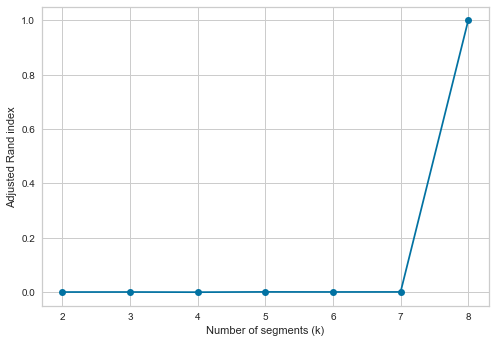

In [47]:
# Plot the adjusted Rand index for each k
plt.plot(k_range, MD_k28, '-o')
plt.xlabel('Number of segments (k)')
plt.ylabel('Adjusted Rand index')
plt.show()

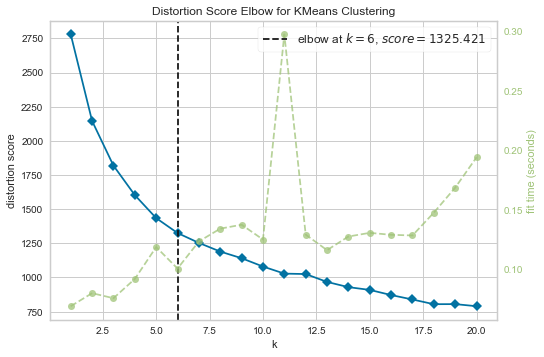

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,21)).fit(MD_x)
visualizer.show()

[0 2 1 ... 1 2 1]
10413.103080765013
11
[[-1.04808891  0.31873518 -0.08525247  0.21408065  0.11048523  0.23735208
   0.53215975 -0.77696211 -0.68080417 -0.36189327  0.22857811]
 [ 0.02570774  0.31873518  0.0516445   0.20221932  0.15215827 -0.24371038
  -1.14602688 -0.03555845  1.25192672 -0.16425385  0.04955411]
 [ 0.81925521  0.25862847  0.03690168 -0.25940977 -0.26379927  0.21109982
   0.60216739  0.72140737 -0.60143736  0.40794545 -0.43266623]
 [-0.93306735 -3.13740077 -0.09984981 -0.06009962  0.41533174 -0.85093201
  -0.54700901 -1.04232491  0.61610334 -0.33665384  1.20112828]]


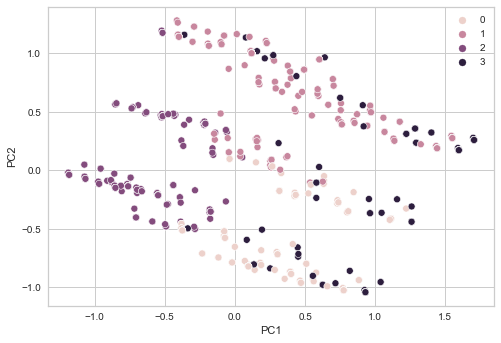

In [49]:

print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.cluster_centers_)
sns.scatterplot(data=pd.DataFrame(pca_df_km, columns=['PC{}'.format(i+1) for i in range(11)]), x='PC1',y='PC2',hue=kmeans.labels_)
plt.legend()
plt.show()

In [50]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.mixture import GaussianMixture

# Extract predictor variables and standardize the data
# X = mcdonalds.iloc[:, 2:13].values
scaler = StandardScaler()
X_std = scaler.fit_transform(MD_x)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10).fit(X_std)

# Print summary statistics
print(gmm.bic(X_std))
print(gmm.aic(X_std))
     

1705.6270383769863
887.0122605235924


<AxesSubplot:xlabel='cluster', ylabel='count'>

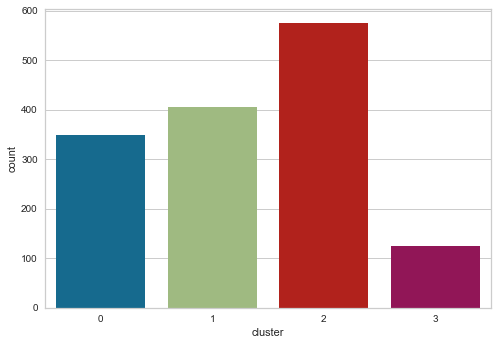

In [51]:

sns.countplot(pca_df_km, x='cluster', )

In [52]:
cluster1 = pca_df_km[pca_df_km['cluster']==0]
cluster2 = pca_df_km[pca_df_km['cluster']==1]
cluster3 = pca_df_km[pca_df_km['cluster']==2]
cluster4 = pca_df_km[pca_df_km['cluster']==3]

In [53]:
df['cluster_num']=kmeans.labels_
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


In [54]:
print(df['VisitFrequency'].value_counts())

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [55]:
df['VisitFrequency']=df["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})
df['Like']=df["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df['Gender'] = df["Gender"].replace({'Female':0, 'Male':1})

In [56]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,0
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,2
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,1
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,0


<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

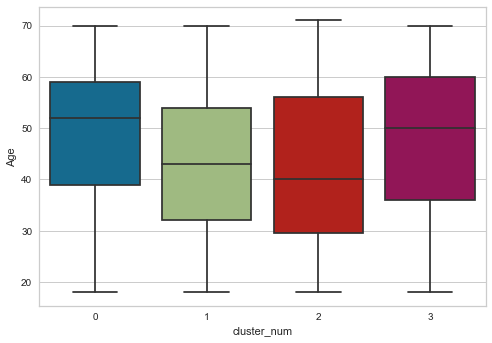

In [57]:
sns.boxplot(x='cluster_num', y='Age', data=df)

In [58]:
from sklearn.model_selection import train_test_split
X = df.drop(['cluster_num'], axis=1)
y = df['cluster_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

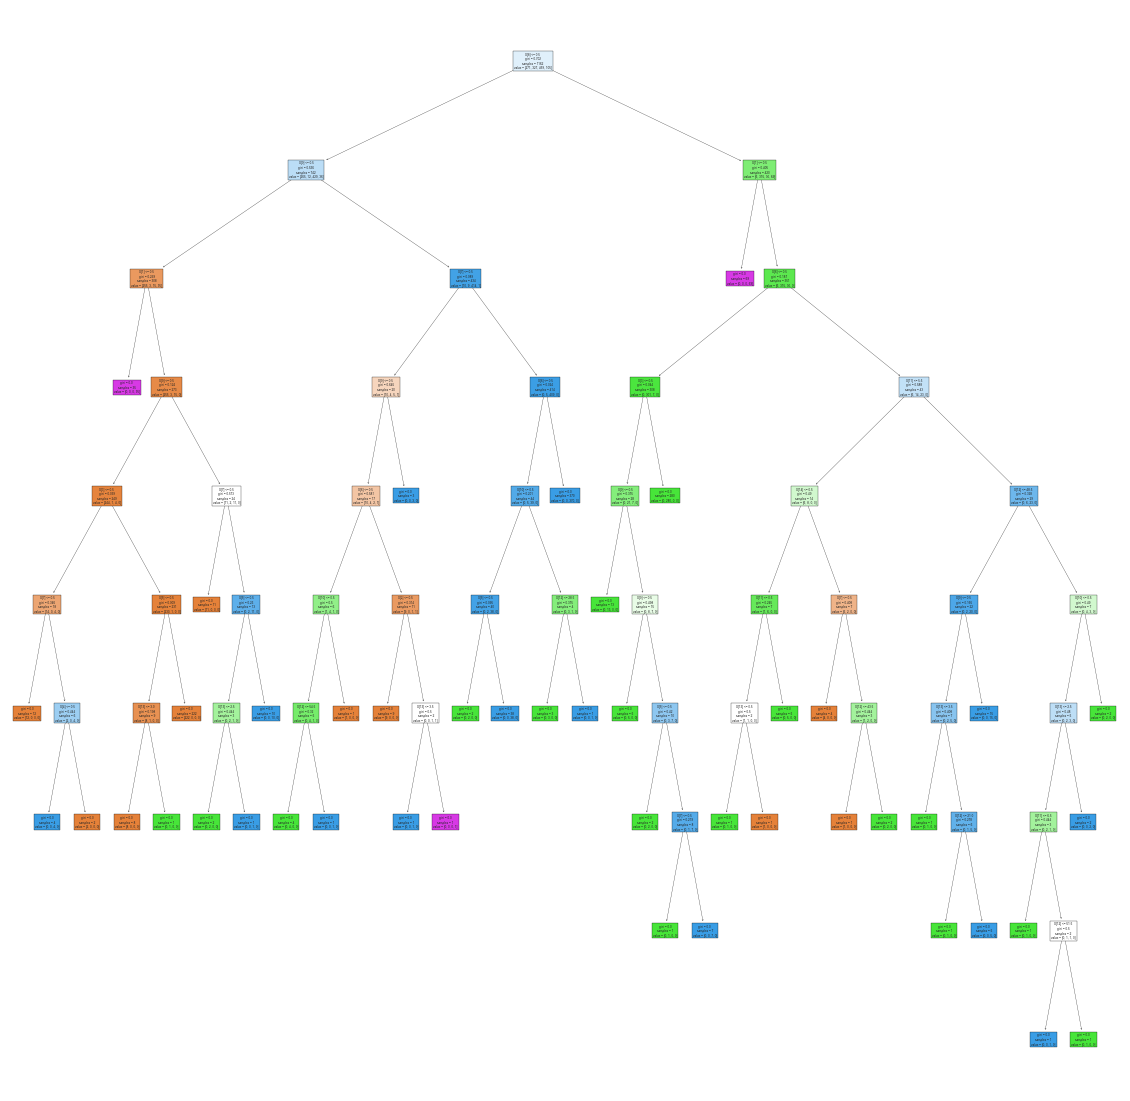

In [62]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtc, filled=True)
plt.show()

In [60]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)*100

97.59450171821305